In [ ]:
import os
import cv2
import numpy as np
import random
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def video2image(video, width, height, total_frame_count):
    # video : videoho
    # width : width when saving as image
    # height : height when saving as image
    # total_frame_count : number of frmames to be extracted
    clips=[]

    cap = cv2.VideoCapture(video)
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = (frame_count/fps)*1000
    
    ms = duration/total_frame_count
    
    success, frame = cap.read()
    frame = frame[:,int(frame.shape[1]/2):]
    new_frame = cv2.resize(frame, (width, height))
    new_frame = new_frame.tolist()
    count = 1
    rate = ms
    cap.set(cv2.CAP_PROP_POS_MSEC, rate)
    clips.append(new_frame)
    while (success == True and count <= total_frame_count):
        success, frame = cap.read()
        if frame is not None:
            frame = frame[:,int(frame.shape[1]/2):]
            new_frame = cv2.resize(frame, (width, height))
            new_frame = new_frame.tolist()
            rate += ms
            count += 1
            cap.set(cv2.CAP_PROP_POS_MSEC, rate)
            clips.append(new_frame)
    if count < total_frame_count:
        clips = clips + [np.zeros([width,height,3])]*(total_frame_count-count)
    else:
        clips = clips[:total_frame_count]
    return(count, clips)
    

In [ ]:
dir = 'drive/MyDrive/U-R fall dataset/video'
videos = os.listdir(dir)
random.shuffle(videos)
height = 128
width = 128
number_of_frame = 16
X = []
Y = []
for video in tqdm(videos):
  count,clips = video2image(os.path.join(dir,video),height,width,number_of_frame)
  if count!=number_of_frame:
    print(video)
  X.append(clips)
  if 'fall' in video:
    Y.append(1)
  else:
    Y.append(0)
    

  1%|          | 1/100 [00:05<08:39,  5.25s/it]


KeyboardInterrupt: ignored

In [ ]:
X = np.array(X)
X.shape

(100, 16, 128, 128, 3)

In [ ]:
Y = np.array(Y)
Y.shape

(100,)

In [ ]:
np.save('drive/MyDrive/U-R fall dataset/data.npy',X)
np.save('drive/MyDrive/U-R fall dataset/label.npy',Y)

Fall


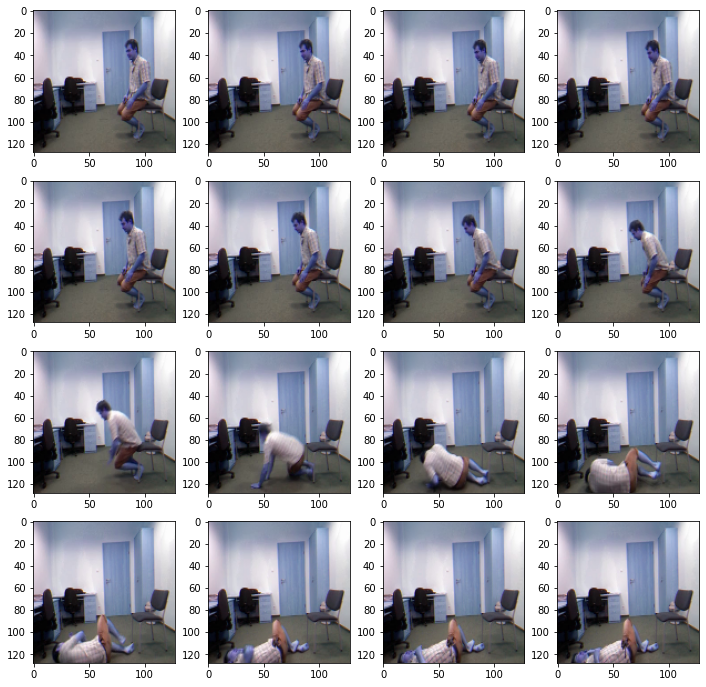

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4,4,figsize=(12,12))
i=0
num=16
d = {0:"ADL",1:"Fall"}
print(d[Y[num]])
for ax1 in ax:
  for ax2 in ax1:
    ax2.imshow(X[num][i])
    i+=1